# attribute availability

In [27]:
import csv
import glob
from pathlib import Path

inputpath = glob.glob(str(Path.cwd().parent / "data" / "pages_*.csv"))
inputpath = list(filter(lambda p: Path(p).name.startswith("pages_") and Path(p).name.endswith(".csv"), inputpath))
assert len(inputpath) > 0
inputpath.sort()
inputpath = inputpath[-1]
inputfile = list(csv.reader(open(inputpath, "r")))
header = [word for word in inputfile[0]]
body = inputfile[1:]

jsons = list(map(lambda row: dict(zip(header, row)), body))
jsons = list(map(lambda json_elem: {k.lower(): v.lower() for k, v in json_elem.items() if isinstance(k, str) and isinstance(v, str)}, jsons))
jsons = list(map(lambda json_elem: {k: (v if v != "" else None) for k, v in json_elem.items()}, jsons))
assert all([set(jsons[0].keys()) == set(json_elem.keys()) for json_elem in jsons])

# get availability
availability = {k: sum([1 for j in jsons if j[k] is not None]) / len(jsons) for k in jsons[0].keys()}
availability = dict(sorted(availability.items(), key=lambda item: item[1], reverse=True))
fail_ratio = 0.4
good_attributes = {k: v for k, v in availability.items() if v > fail_ratio}
bad_attributes = {k: v for k, v in availability.items() if v <= fail_ratio}
GRAY = "\033[90m"
RESET = "\033[0m"
print("good attributes:")
for k, v in good_attributes.items():
    print(f"\t{k}: {v}")
print(f"\n{GRAY}bad attributes:{RESET}")
for k, v in bad_attributes.items():
    print(f"\t{GRAY}{k}: {v}{RESET}")

good attributes:
	address: 1.0
	url: 1.0
	company_name: 0.9968764733616219
	title: 0.9968764733616219
	price: 0.9863861386138614
	wohnfläche: 0.9781353135313532
	company_address: 0.9761315417256011
	company_broker_name: 0.9711810466760962
	objekttyp: 0.9648750589344649
	last_update: 0.9648750589344649
	description_general: 0.9633427628477134
	company_reference_id: 0.9533828382838284
	company_url: 0.9471947194719472
	description_additional: 0.9397100424328148
	zimmer: 0.9386492220650636
	description_equipment: 0.9035832154644036
	description_location: 0.8877887788778878
	heizung: 0.7958510136727959
	energy_certificate: 0.7783474776049033
	zustand: 0.7677982083922678
	maklerprovision:: 0.7570721357850071
	stockwerk(e): 0.7339698255539839
	type: 0.7113979255068364
	bautyp: 0.6901815181518152
	böden: 0.6321310702498821
	total_additional_costs: 0.5103135313531353
	wohneinheiten: 0.4107142857142857

bad attributes:
	monatliche kosten (inkl. mwst): 0.345002357378595
	balkon: 0.330622347949080

Matplotlib is building the font cache; this may take a moment.
/var/folders/p6/sy85mkz13lsffnvz7237y4340000gn/T/ipykernel_2666/3298436615.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


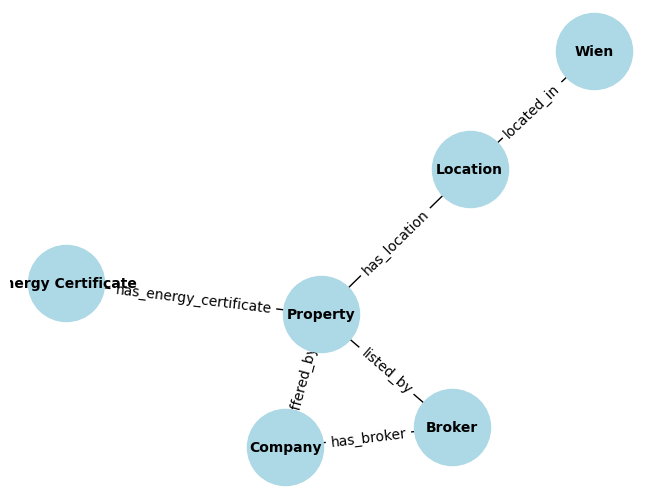

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Add nodes
G.add_node("Property")
G.add_node("Location")
G.add_node("Company")
G.add_node("Energy Certificate")
G.add_node("Broker")

# Add edges
G.add_edge("Property", "Location", label="has_location")
G.add_edge("Property", "Company", label="offered_by")
G.add_edge("Property", "Energy Certificate", label="has_energy_certificate")
G.add_edge("Property", "Broker", label="listed_by")
G.add_edge("Location", "Wien", label="located_in")
G.add_edge("Company", "Broker", label="has_broker")

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off')
plt.tight_layout()
plt.show()